In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# indicate your path to the data
path = "/Users/bagafoufabrice/Downloads/train.csv"

In [3]:
# Load the data from the text file into a DataFrame
df = pd.read_csv(path, sep = ',')

#print(df)
# Print the DataFrame
df = df.drop(['row_id'],axis = 1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
dtypes: float64(11), int64(5)
memory usage: 639.4 MB
None


In [4]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
df.head(20)

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
dtype: int64


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0
5,5,0,0,0.00,0,1.000635,13552875.92,NaN,NaN,0.999779,1962.72,1.000635,5647.65,1.0,6.779432,0
6,6,0,0,969969.40,1,1.000115,3647503.98,NaN,NaN,0.999506,6663.16,1.000283,3810.48,1.0,-2.499819,0
7,7,0,0,9412959.10,1,0.999818,21261245.87,NaN,NaN,0.999741,5139.20,1.000130,2570.60,1.0,-1.959801,0
8,8,0,0,2394875.85,1,0.999916,9473209.08,NaN,NaN,0.999022,52011.60,1.000041,2169.36,1.0,-5.970001,0
9,9,0,0,3039700.65,-1,1.000969,6248958.45,NaN,NaN,0.999354,6191.00,1.000646,6199.00,1.0,7.970333,0


In [5]:
print('Nombre de jours : ',len(df['date_id'].unique()))
print('nombre de stocks differents : ',len(df['stock_id'].unique()))

Nombre de jours :  481
nombre de stocks differents :  200


In [6]:
def regrouper_par_id_similaire(dataframe,id_):
    grouped = dataframe.groupby(id_)
    groupes = []
    for _, groupe in grouped:
        groupes.append(groupe)
    return groupes

groupes = regrouper_par_id_similaire(df,'stock_id')

### Day 1 ask price plot for stock all stocks

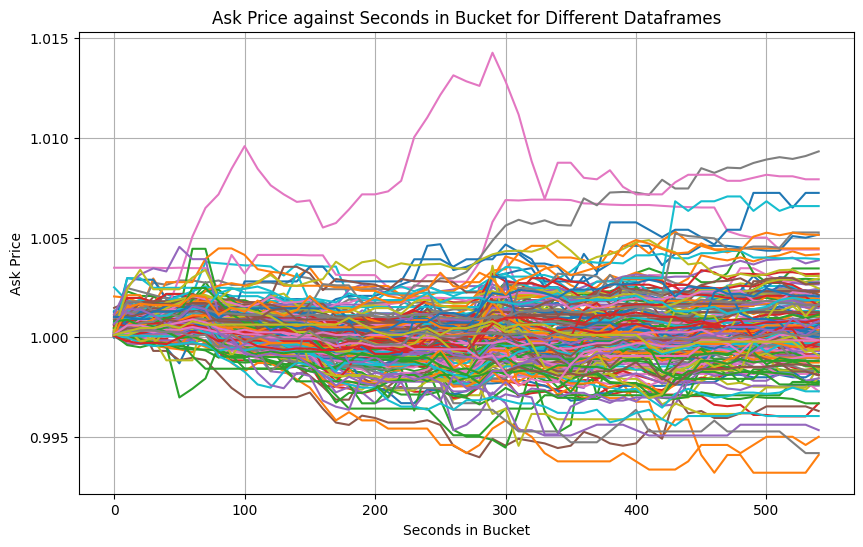

In [57]:
#a = groupes[0][groupes[0]['date_id'] == 0]
#b = groupes[1][groupes[1]['date_id'] == 0]#print(len(a['seconds_in_bucket'])/6)
#a['ask_price'].plot()
#b['ask_price'].plot()
plt.figure(figsize=(10, 6))  # Create a figure to hold the plots

for i in range(len(groupes)):
    a = groupes[i][groupes[i]['date_id'] == 0]
    plt.plot(a['seconds_in_bucket'], a['ask_price'], label=f'Dataframe {i}')  # Plot ask_price against seconds_in_bucket

plt.xlabel('Seconds in Bucket')
plt.ylabel('Ask Price')
plt.title('Ask Price against Seconds in Bucket for Different Dataframes')
#plt.legend()  # Show the legend for different dataframes
plt.grid(True)
plt.show()
    


### Day 2 ask price plot for stock all stocks

### Day 1 target stock price plot for stock all stocks

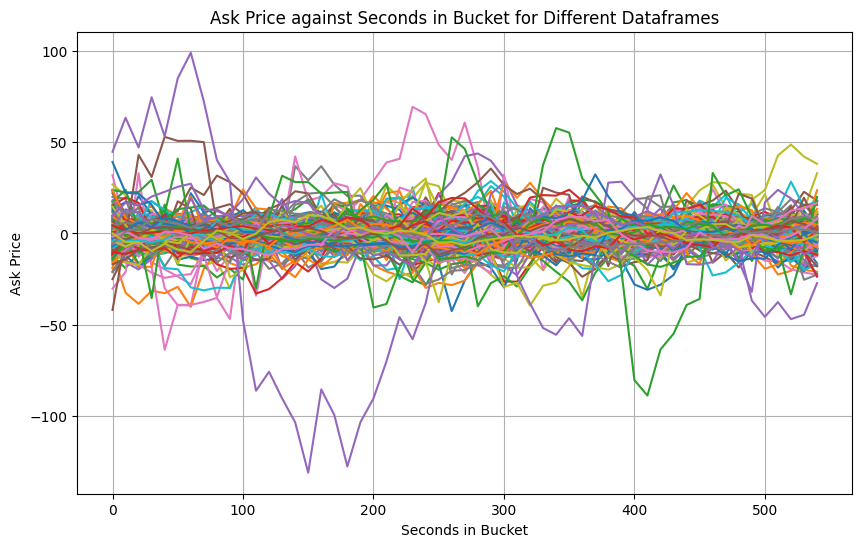

In [60]:

plt.figure(figsize=(10, 6))  # Create a figure to hold the plots

for i in range(len(groupes)):
    a = groupes[i][groupes[i]['date_id'] == 1]
    plt.plot( a['seconds_in_bucket'],a['target'], label=f'Dataframe {i}')  # Plot ask_price against seconds_in_bucket

plt.xlabel('Seconds in Bucket')
plt.ylabel('Ask Price')
plt.title('Ask Price against Seconds in Bucket for Different Dataframes')
#plt.legend()  # Show the legend for different dataframes
plt.grid(True)
plt.show()

In [10]:
groupes[0].head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4


A faire :
* Etat de l'art des modèles RNN pour des time series (LSTM,ARIMA etc...)
* definition de l'entrée : vecteur shape [200,17]
* definition de la sortie : vecteur shape [200,1] -> target a chaque instant
* a demander, nombre de paramètre avec la capacité GPU
* enlever des colonnes ?
* preparer la donnée

## Data preparation

In [11]:
groupes_datetime = regrouper_par_id_similaire(df,'date_id')

In [12]:
print('jour diff : ',len(groupes_datetime))
for i in range(len(groupes_datetime)):
    #print(groupec)
    if i%100 == 0:
        
        print('daly data shape ',i,' : ',len(groupes_datetime[0]))


jour diff :  481
daly data shape  0  :  10505
daly data shape  100  :  10505
daly data shape  200  :  10505
daly data shape  300  :  10505
daly data shape  400  :  10505


In [38]:
dates_groupes = []
target = []
for i in range(len(groupes_datetime)):
    dates_groupes.append(regrouper_par_id_similaire(groupes_datetime[i],'time_id'))
    #print(dates_groupes)
    #target.append(dates_groupes[i]['target'].values)

for i in range(len(dates_groupes)):
    target_inter = []
    for k in range(len(dates_groupes[i])) :
        #target extraction
        
        target_inter.append(dates_groupes[i][k]['target'].values)
        dates_groupes[i][k] = dates_groupes[i][k].drop(['time_id','date_id'],axis = 1)
        dates_groupes[i][k] = dates_groupes[i][k].values
    
    target.append(target_inter)

#dates_groupes = np.array(dates_groupes)


Comptage nombre de stock par jour

In [14]:
#print(groupes_datetime[0]['stock_id'].unique())
#for i in groupes_datetime :
    #print(len(i['stock_id'].unique()))


In [42]:
for i in range(len(dates_groupes)):
    dates_groupes[i] = np.array(dates_groupes[i]).reshape(55, -1)
    #print(dates_groupes[i].shape)


X_train -> shape(481,55,2800)
* 481 -> number of dates
* 55 -> number on data per day
* 2800 -> number of features per data

## Model definition

In [49]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 208.8 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 5.3 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 9.6 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 3.7 MB/s eta 0:00:01
  Using cached ml_dtypes-0.2.0-cp39-cp39-macosx_10_9_universal2.whl (1.2 MB)
     |████████████████████████████████| 441 kB 5.5 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.w

In [50]:

import tensorflow as tf
import keras
from keras import layers

/Users/bagafoufabrice/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [51]:
numHiddenUnits = 100
numClasses = 9
layers = [
    sequenceInputLayer(inputSize),
    bilstmLayer(numHiddenUnits,'OutputMode','last'),
    fullyConnectedLayer(numClasses),
    softmaxLayer,
    classificationLayer]

NameError: name 'sequenceInputLayer' is not defined